# Section 1 : Gradient Checking

Before training our network, it is important to verify that the **backpropagation implementation** is correct.  

Gradient checking is a method to ensure that the **analytical gradients** computed by backpropagation match the **numerical gradients** estimated using finite differences.  

We use the following approach:

1. **Analytical Gradients:**  
   - Computed using the `backward()` methods of our layers.  

2. **Numerical Gradients:**  
   - Approximated with the formula:  
     \[
     \frac{\partial L}{\partial W} \approx \frac{L(W + \epsilon) - L(W - \epsilon)}{2 \epsilon}
     \]  
   - Here, \( \epsilon \) is a very small number (default \( 1e-5 \)).

3. **Comparison:**  
   - We calculate the maximum difference between analytical and numerical gradients.  
   - If the difference is very small (e.g., less than \(1e-6\)), our backpropagation is likely correct.

This step ensures the **core of our neural network library is functioning properly** before training on the XOR problem.


In [2]:
import sys
import os

# Add the lib folder to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

# Test import
from AROGO.layers import Dense
from AROGO.activations import Tanh, Sigmoid
from AROGO.losses import MSELoss
from AROGO.optimizer import SGD
from AROGO.network import Sequential

import numpy as np
import matplotlib.pyplot as plt


def numerical_gradient(model, X, Y, loss_fn, eps=1e-5):
    grads_num = []

    for layer in model.layers:
        if hasattr(layer, "W"):
            dW_num = np.zeros_like(layer.W)

            for i in range(layer.W.shape[0]):
                for j in range(layer.W.shape[1]):
                    W_old = layer.W[i, j]

                    layer.W[i, j] = W_old + eps
                    loss_plus = loss_fn.forward(Y, model.forward(X))

                    layer.W[i, j] = W_old - eps
                    loss_minus = loss_fn.forward(Y, model.forward(X))

                    dW_num[i, j] = (loss_plus - loss_minus) / (2 * eps)
                    layer.W[i, j] = W_old

            grads_num.append(dW_num)

    return grads_num


# analytical gradients
y_pred = model.forward(X)
loss_fn.forward(Y, y_pred)
grad = loss_fn.backward()
model.backward(grad)

# numerical gradients
num = numerical_gradient(model, X, Y, loss_fn)

dense1 = model.layers[0]
print("Analytical:\n", dense1.dW)
print("Numerical:\n", num[0])
print("Max Diff:", np.max(np.abs(dense1.dW - num[0])))

Analytical:
 [[-0.0002497   0.000438    0.00047559 -0.00050473]
 [-0.00023361 -0.00056464  0.00036077  0.00046903]]
Numerical:
 [[-0.0002497   0.000438    0.00047559 -0.00050473]
 [-0.00023361 -0.00056464  0.00036077  0.00046903]]
Max Diff: 2.2645454305150747e-13


# Section 2 : XOR Problem Using Our Custom Neural Network Library

In this section, we demonstrate how to use the neural network library we implemented from scratch to solve the **XOR problem**.  
  
We train the network using:

- **Mean Squared Error (MSE)** as the loss function  
- **Stochastic Gradient Descent (SGD)** as the optimizer  

The goal is to have the network correctly predict all four XOR outputs after training.


In [1]:
import sys
import os

# Add the lib folder to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

# Test import
from AROGO.layers import Dense
from AROGO.activations import Tanh, Sigmoid, ReLU
from AROGO.losses import MSELoss
from AROGO.optimizer import SGD
from AROGO.network import Sequential

import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(2, 4))
model.add(Tanh())
model.add(Dense(4, 1))
model.add(Sigmoid())

loss_fn = MSELoss()
optimizer = SGD(lr=0.1)

model.train(X, Y, loss_fn, optimizer, epochs=5000)


print("Predictions after training:")
print(model.forward(X))

Epoch 0, Loss: 0.24016724942158146
Epoch 2000, Loss: 0.008508580787975907
Epoch 4000, Loss: 0.0020860207360425694
Predictions after training:
[[0.02701817]
 [0.96183449]
 [0.9615405 ]
 [0.04587022]]


In [3]:
z = np.array([[5,5],[-5,5],[-5,5],[-5,-5]])
print(model.predict_classes(z))

[[0]
 [0]
 [0]
 [1]]


# Section 3: 
The Autoencoder (training, loss curve, and image 
visualizations) using your library.
In this part, the MNIST dataset is used to train an unsupervised autoencoder implemented from scratch using NumPy.
Each MNIST image is represented as a 784-dimensional vector (28 × 28 pixels) and normalized to the range [0, 1].

To ensure proper evaluation and avoid overfitting, the dataset is divided into three separate subsets:

Training set: used to update the network weights

Validation set: used to monitor generalization performance during training

Test set: used only for final evaluation and visualization

 Dataset split :

The dataset is split as follows:

Total samples: 70,000 images

Training set: 50,400 samples (72%)

Validation set: 5,600 samples (8%)

Test set: 14,000 samples (20%)

The encoder compresses the input into a latent representation, the latent space stores the most important features, and the decoder reconstructs the original image from this compressed form.

Epoch 100/1500, Train Loss: 0.068392, Val Loss: 0.068212
Epoch 200/1500, Train Loss: 0.063358, Val Loss: 0.063197
Epoch 300/1500, Train Loss: 0.054783, Val Loss: 0.054680
Epoch 400/1500, Train Loss: 0.048532, Val Loss: 0.048498
Epoch 500/1500, Train Loss: 0.044780, Val Loss: 0.044782
Epoch 600/1500, Train Loss: 0.041420, Val Loss: 0.041414
Epoch 700/1500, Train Loss: 0.038158, Val Loss: 0.038140
Epoch 800/1500, Train Loss: 0.035479, Val Loss: 0.035461
Epoch 900/1500, Train Loss: 0.033376, Val Loss: 0.033359
Epoch 1000/1500, Train Loss: 0.031664, Val Loss: 0.031652
Epoch 1100/1500, Train Loss: 0.030194, Val Loss: 0.030191
Epoch 1200/1500, Train Loss: 0.028789, Val Loss: 0.028799
Epoch 1300/1500, Train Loss: 0.027403, Val Loss: 0.027421
Epoch 1400/1500, Train Loss: 0.026131, Val Loss: 0.026157
Epoch 1500/1500, Train Loss: 0.025023, Val Loss: 0.025057


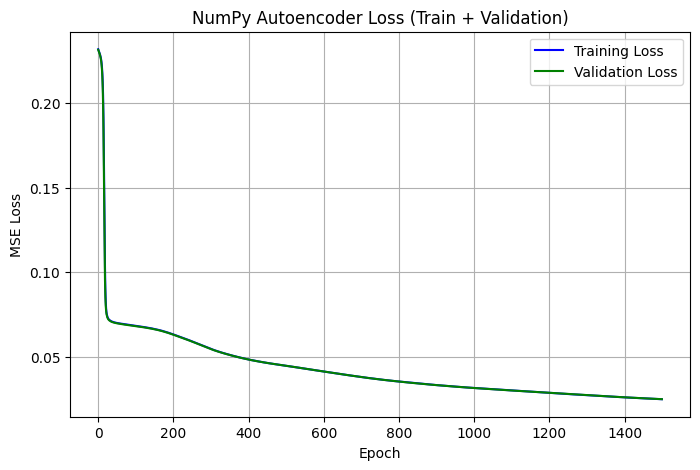

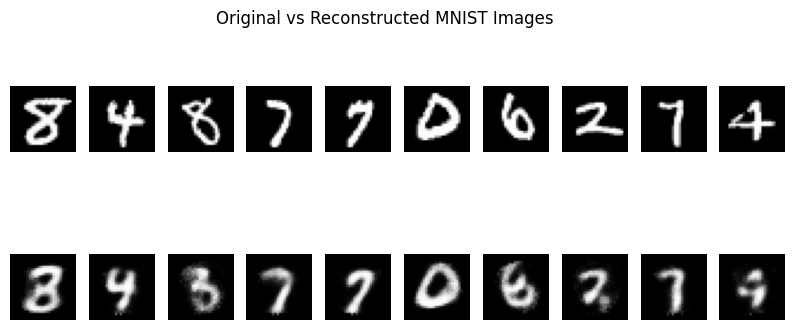

In [4]:
# =========================
# NumPy Autoencoder 
# =========================

#Imports
from AROGO.layers import Dense
from AROGO.activations import ReLU, Sigmoid
from AROGO.losses import MSELoss
from AROGO.optimizer import SGD
from AROGO.network import Sequential

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# -------------------------
#  Load MNIST
# -------------------------
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.to_numpy().astype(np.float32) / 255.0
y = mnist.target.to_numpy().astype(int)

# -------------------------
# Train/Validation/Test split
# -------------------------
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split train into train + validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

# -------------------------
#  Build Autoencoder
# -------------------------
latent_dim = 64
autoencoder = Sequential()

# Encoder
autoencoder.add(Dense(784, 128))
autoencoder.add(ReLU())
autoencoder.add(Dense(128, latent_dim))
autoencoder.add(ReLU())

# Decoder
autoencoder.add(Dense(latent_dim, 128))
autoencoder.add(ReLU())
autoencoder.add(Dense(128, 784))
autoencoder.add(Sigmoid())  # Output 0-1

# -------------------------
#  Training setup
# -------------------------
loss_fn = MSELoss()
optimizer = SGD(lr=0.01)  # stable learning rate

epochs = 1500
batch_size = 128
train_losses = []
val_losses = []

# -------------------------
# Training loop
# -------------------------
for epoch in range(epochs):
    perm = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[perm]

    batch_losses = []

    # Train on batches
    for i in range(0, len(X_train), batch_size):
        batch = X_train_shuffled[i:i+batch_size]
        y_pred = autoencoder.forward(batch)
        loss = loss_fn.forward(batch, y_pred)
        batch_losses.append(loss)

        grad = loss_fn.backward()
        autoencoder.backward(grad)
        optimizer.step(autoencoder.layers)

    # Average training loss
    epoch_train_loss = np.mean(batch_losses)
    train_losses.append(epoch_train_loss)

    # Validation loss
    y_val_pred = autoencoder.forward(X_val)
    epoch_val_loss = loss_fn.forward(X_val, y_val_pred)
    val_losses.append(epoch_val_loss)

    # Print every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_train_loss:.6f}, Val Loss: {epoch_val_loss:.6f}")

# -------------------------
#  Plot training + validation loss
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='green')
plt.title("NumPy Autoencoder Loss (Train + Validation)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
#  Visualize reconstructed images
# -------------------------
n = 10
recon = autoencoder.forward(X_test[:n])

plt.figure(figsize=(10,4))
for i in range(n):
    # Original
    plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    plt.subplot(2, n, i+n+1)
    plt.imshow(recon[i].reshape(28,28), cmap='gray')
    plt.axis('off')

plt.suptitle("Original vs Reconstructed MNIST Images")
plt.show()

# Section 4 : Latent Space Classification using SVM

In this part, the latent representations learned by the autoencoder are used for digit classification.
Instead of training a classifier directly on raw pixel values, each image is first passed through the encoder to obtain a low-dimensional latent vector.

These latent vectors capture the most important structural features of the digits and are then used as input to a Support Vector Machine (SVM) classifier.
This approach demonstrates that the autoencoder has learned meaningful and discriminative features.

 Classification setup

Input to SVM: 64-dimensional latent vectors

Classifier: Support Vector Machine (RBF kernel)

Training set: Latent features from training images

Validation set: Used to evaluate generalization

Test set: Used for final performance evaluation

Visualization of predictions is used to qualitatively verify the SVM’s classification performance and analyze misclassifications based on the learned latent representations.


Latent feature shape (train): (50400, 64)
Latent feature shape (val): (5600, 64)
Latent feature shape (test): (14000, 64)
SVM Training Accuracy: 96.78%
SVM Validation Accuracy: 95.52%
SVM Test Accuracy: 95.37%

Confusion Matrix (Test Set):
[[1309    1    8    0    5    3    7    3    6    1]
 [   0 1579    5    6    1    0    1    3    2    3]
 [   2    6 1327    7    4    5    6   11   10    2]
 [   3    5   17 1335    1   21    3   14   26    8]
 [   2    1    4    0 1234    0    7    5    2   40]
 [   5    2    5   30    5 1200    9    1   13    3]
 [   4    1   11    0    8    8 1361    0    3    0]
 [   3    8   16    1    7    2    0 1436    2   28]
 [   4    9   12   26    7   23    9    4 1254    9]
 [   8   10    3   14   31    6    1   21    9 1317]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1343
           1       0.97      0.99      0.98      1600
           2       0.94      0.

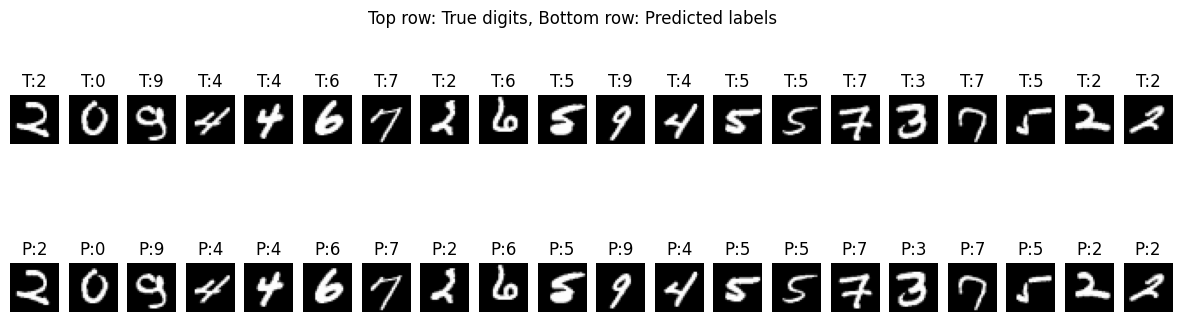

In [ ]:
# =========================
# Latent Space SVM Classification 
# =========================

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Function to extract latent features from encoder
# -------------------------
def encode(model, X):
    x = X
    # Only the encoder part (first 4 layers)
    for layer in model.layers[:4]:
        x = layer.forward(x)
    return x

# -------------------------
# Extract latent features
# -------------------------
X_train_latent = encode(autoencoder, X_train)  # 50,400 samples
X_val_latent   = encode(autoencoder, X_val)    # 5,600 samples
X_test_latent  = encode(autoencoder, X_test)   # 14,000 samples

print("Latent feature shape (train):", X_train_latent.shape)
print("Latent feature shape (val):", X_val_latent.shape)
print("Latent feature shape (test):", X_test_latent.shape)

# -------------------------
#  Scale latent features (important for RBF SVM)
# -------------------------
scaler = StandardScaler()
X_train_latent = scaler.fit_transform(X_train_latent)
X_val_latent   = scaler.transform(X_val_latent)
X_test_latent  = scaler.transform(X_test_latent)

# -------------------------
#  Train SVM on latent features
# -------------------------
svm = SVC(kernel='rbf')  # RBF kernel for non-linear separation
svm.fit(X_train_latent, y_train)

# -------------------------
#  Evaluate SVM
# -------------------------
y_train_pred = svm.predict(X_train_latent)
y_val_pred   = svm.predict(X_val_latent)
y_test_pred  = svm.predict(X_test_latent)

print(f"SVM Training Accuracy: {accuracy_score(y_train, y_train_pred)*100:.2f}%")
print(f"SVM Validation Accuracy: {accuracy_score(y_val, y_val_pred)*100:.2f}%")
print(f"SVM Test Accuracy: {accuracy_score(y_test, y_test_pred)*100:.2f}%\n")

print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# -------------------------
#  Visualize some predictions
# -------------------------
n = 20
indices = np.random.choice(len(X_test), n, replace=False)

X_sample = X_test[indices]
y_true_sample = y_test[indices]
y_pred_sample = y_test_pred[indices]

plt.figure(figsize=(15,4))
for i in range(n):
    # Original image
    plt.subplot(2, n, i+1)
    plt.imshow(X_sample[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(f"T:{y_true_sample[i]}")  # True label

    # Predicted label
    plt.subplot(2, n, i+n+1)
    plt.imshow(X_sample[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(f"P:{y_pred_sample[i]}")  # Predicted label

plt.suptitle("Top row: True digits, Bottom row: Predicted labels")
plt.show()

In [5]:
print(Dense)

<class 'AROGO.layers.Dense'>


# Section 5 : TensorFlow Implementation and Comparison

To validate the correctness of our custom neural network library, we implement equivalent models using TensorFlow/Keras, a widely adopted deep learning framework.
This comparison ensures that the behavior of our manually implemented networks is consistent with a standard, optimized library.

 XOR Network Comparison :

As a first validation step, we implement the same 2–4–1 XOR neural network using TensorFlow/Keras.
This simple supervised learning task allows us to directly compare the behavior of both implementations.

We compare the following aspects:

Ease of Implementation – How quickly and easily the network can be defined and trained using TensorFlow compared to the custom library.

Training Time – The approximate time required for the network to converge.

Final Predictions – The output values produced for the XOR input combinations.

Matching predictions between both implementations confirm the correctness of the forward and backward propagation logic in the custom library.

 Autoencoder Comparison :

After validating the custom implementation using the XOR problem, we extend the comparison to a more complex task: MNIST image reconstruction using an autoencoder.

The TensorFlow autoencoder follows the same architecture as the NumPy-based model:

Encoder:

Input layer (784 units)

Hidden layer (128 units, ReLU)

Latent layer (64 units, ReLU)

Decoder:

Hidden layer (128 units, ReLU)

Output layer (784 units, Sigmoid)

To ensure a fair comparison, both implementations use:

The same latent dimension

The same loss function (MSE)

The same learning rate

The same training and validation splits

 Evaluation :

Training and validation loss curves from the TensorFlow autoencoder are plotted alongside those from the NumPy implementation.
Similar convergence behavior and loss values indicate that the custom autoencoder correctly learns meaningful representations and generalizes well.

TensorFlow is used as a reference implementation to validate the correctness, efficiency, and learning behavior of the custom neural network library on both XOR classification and MNIST autoencoding tasks.

c:\Users\user\OneDrive\Desktop\CI_Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predictions (TensorFlow XOR):
[[0.04604067]
 [0.96110696]
 [0.9490875 ]
 [0.05771312]]


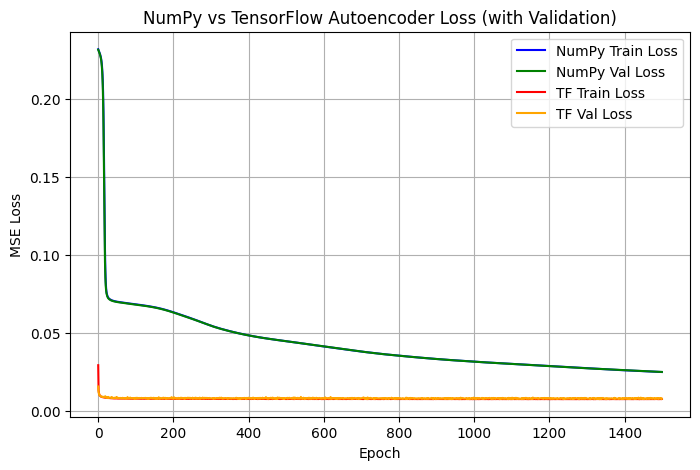

In [ ]:
# =========================
# TensorFlow Autoencoder + XOR Comparison (with Validation)
# =========================

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
#  XOR Dataset and Keras Model
# -------------------------
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
Y_xor = np.array([[0],[1],[1],[0]], dtype=np.float32)

tf_xor_model = Sequential([
    Dense(4, input_dim=2, activation='tanh'),
    Dense(1, activation='sigmoid')
])

tf_xor_model.compile(optimizer=SGD(learning_rate=0.1), loss='mse')

# Train XOR model
tf_xor_model.fit(X_xor, Y_xor, epochs=5000, verbose=0)

# Predictions
xor_preds = tf_xor_model.predict(X_xor)
print("Predictions (TensorFlow XOR):")
print(xor_preds)

# -------------------------
#  TensorFlow Autoencoder
# -------------------------
latent_dim = 64
epochs_ae = 1500
batch_size = 128

# Autoencoder input
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(latent_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

tf_autoencoder = Model(inputs=input_img, outputs=decoded)

# Compile with learning rate = 0.01 to match NumPy autoencoder
tf_autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train autoencoder with validation set
history = tf_autoencoder.fit(
    X_train, X_train,
    epochs=epochs_ae,
    batch_size=batch_size,
    validation_data=(X_val, X_val),
    verbose=0
)

# -------------------------
#  Plot NumPy vs TensorFlow Autoencoder Loss
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='NumPy Train Loss', color='blue')
plt.plot(val_losses, label='NumPy Val Loss', color='green')
plt.plot(history.history['loss'], label='TF Train Loss', color='red')
plt.plot(history.history['val_loss'], label='TF Val Loss', color='orange')
plt.title("NumPy vs TensorFlow Autoencoder Loss (with Validation)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

# Comparison :  TensorFlow Implementation and Comparison
1- ease of implementaion :
our lib has more ease of implementaion than tensor flow (keras) 

2-training time :
our lib has less training time than tensor flow (keras) 

3-final predections :
 
our lib results :
[[0.01332864]
 [0.97127211]
 [0.97049072]
 [0.03451367]]

 tensor flow (keras) :
 [[0.01457623]
 [0.9690686 ]
 [0.97115225]
 [0.03383316]]

Comparison between Tensor flow training and our training :
1-ease of implementation :
our lib has more ease of implementaion 

2-training time :

our lib : 42.49 min 

tensor flow : 37.81 min 

so tensor flow has better training time 

3-final predections :

from graph :  

Tensor flow loss is smaller than our lib

so Tensor flow is better in final predection  